# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

In [50]:
# 핵심사용자만 엑셀로 분류한 파일 불러오기
core_data = pd.read_table('data/mini_core.csv',sep=',')
core_data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b9f171ae,22,1,16,22,13,14,94,3,4,Medium,Premium,0,7,1
1,0eac44aa,22,8,11,19,5,10,58,5,4,Medium,Basic,4,7,1
2,69d99a48,20,25,16,21,2,15,86,4,5,Low,Premium,4,3,1
3,9c9e76a1,20,5,14,6,3,13,94,3,3,Low,Basic,0,3,1
4,11c0c39b,6,17,12,281,17,15,81,1,4,Low,Premium,0,3,1


In [4]:
# 2308개의 값이 있음 null 값은 없는 것으로 확인
core_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2308 entries, 0 to 2307
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            2308 non-null   object 
 1   subscription_duration              2308 non-null   int64  
 2   recent_login_time                  2308 non-null   int64  
 3   average_login_time                 2308 non-null   float64
 4   average_time_per_learning_session  2308 non-null   float64
 5   monthly_active_learning_days       2308 non-null   int64  
 6   total_completed_courses            2308 non-null   int64  
 7   recent_learning_achievement        2308 non-null   float64
 8   abandoned_learning_sessions        2308 non-null   int64  
 9   community_engagement_level         2308 non-null   int64  
 10  preferred_difficulty_level         2308 non-null   object 
 11  subscription_type                  2308 non-null   objec

In [7]:
# EDA / 유저id가 유니크한 데이터라는것 확인 / 
core_data["user_id"].describe()

count         2308
unique        2308
top       b9f171ae
freq             1
Name: user_id, dtype: object

In [49]:
# 비핵심사용자만 엑셀로 분류한 파일 불러오기
ncore_data = pd.read_table('data/mini_ncore.csv',sep=',')
ncore_data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,594da7eb,19,21,14,135,13,11,76,0,4,High,Basic,2,1,0
1,aba89783,2,27,10,3,20,8,82,4,5,Low,Basic,4,6,0
2,4716e6cb,7,22,10,79,24,13,91,2,3,Low,Basic,3,6,0
3,d35c46d7,8,19,12,19,19,13,88,1,5,High,Premium,2,1,0
4,677de4b6,14,26,20,161,22,10,60,2,5,Low,Premium,1,6,0


In [6]:
# 2357개의 값이 있음 null 값은 없는 것으로 확인
ncore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            2357 non-null   object 
 1   subscription_duration              2357 non-null   int64  
 2   recent_login_time                  2357 non-null   int64  
 3   average_login_time                 2357 non-null   float64
 4   average_time_per_learning_session  2357 non-null   float64
 5   monthly_active_learning_days       2357 non-null   int64  
 6   total_completed_courses            2357 non-null   int64  
 7   recent_learning_achievement        2357 non-null   float64
 8   abandoned_learning_sessions        2357 non-null   int64  
 9   community_engagement_level         2357 non-null   int64  
 10  preferred_difficulty_level         2357 non-null   object 
 11  subscription_type                  2357 non-null   objec

In [8]:
# EDA / 유저id가 유니크한 데이터라는것 확인 / 
ncore_data["user_id"].describe()

count         2357
unique        2357
top       594da7eb
freq             1
Name: user_id, dtype: object

### 핵심/비핵심사용자간 학습패턴 데이터 비교

In [26]:
# 핵심사용자그룹 활동학습일별 수강생 수 전처리 하기

coresub = core_data.groupby('monthly_active_learning_days')['user_id'].count()
coresub = coresub.sort_index()
coresub

monthly_active_learning_days
1      94
2     104
3      89
4      96
5     100
6      94
7      96
8     101
9      88
10    106
11     92
12     83
13     94
14    108
15     91
16     69
17    101
18     86
19     94
20    112
21    103
22     88
23     99
24    120
Name: user_id, dtype: int64

In [27]:
# 비핵심사용자그룹 활동학습일별 수강생 수 전처리 하기

ncoresub = ncore_data.groupby('monthly_active_learning_days')['user_id'].count()
ncoresub = ncoresub.sort_index()
ncoresub

monthly_active_learning_days
1      67
2      98
3      98
4     113
5     104
6      87
7      87
8     101
9     102
10    118
11     83
12    101
13    102
14    103
15     98
16    101
17    101
18    107
19     99
20     99
21    101
22     91
23     94
24    102
Name: user_id, dtype: int64

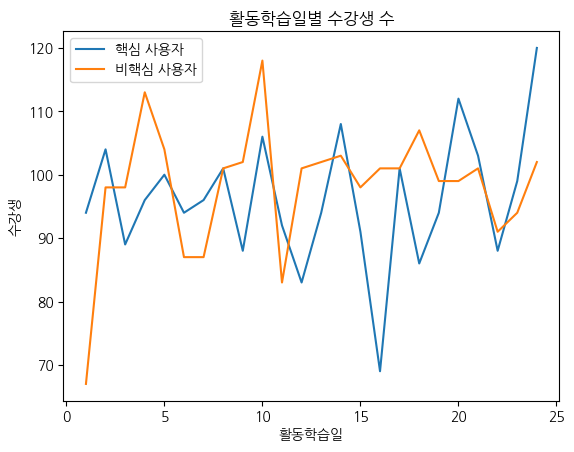

In [32]:
plt.plot(coresub, label="핵심 사용자")
plt.plot(ncoresub, label="비핵심 사용자")
plt.title('활동학습일별 수강생 수')
plt.xlabel('활동학습일')
plt.ylabel('수강생')
plt.legend()
plt.show()

In [40]:
# 핵심사용자그룹 완료코스별 수강생 수 전처리 하기

corecomp = core_data.groupby('total_completed_courses')['user_id'].count()
corecomp = corecomp.sort_index()
corecomp

total_completed_courses
2       2
3       7
4      17
5      36
6      53
7      99
8     143
9     184
10    210
11    246
12    250
13    242
14    223
15    170
16    131
17    110
18     81
19     48
20     19
21     19
22      4
23      6
24      5
25      1
26      1
27      1
Name: user_id, dtype: int64

In [41]:
# 비핵심사용자그룹 완료코스별 수강생 수 전처리 하기

ncorecomp = ncore_data.groupby('total_completed_courses')['user_id'].count()
ncorecomp = ncorecomp.sort_index()
ncorecomp

total_completed_courses
2       2
3       6
4      11
5      35
6      59
7     108
8     133
9     189
10    219
11    262
12    256
13    237
14    216
15    183
16    126
17    112
18     75
19     51
20     36
21     13
22     12
23      8
24      4
25      1
26      2
27      1
Name: user_id, dtype: int64

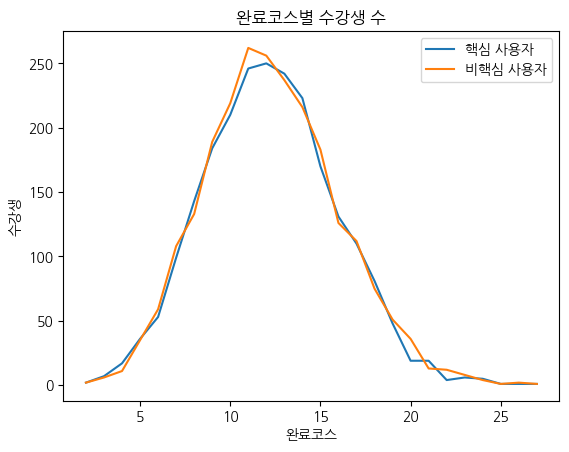

In [43]:
plt.plot(corecomp, label="핵심 사용자")
plt.plot(ncorecomp, label="비핵심 사용자")
plt.title('완료코스별 수강생 수')
plt.xlabel('완료코스')
plt.ylabel('수강생')
plt.legend()
plt.show()

핵심/비핵심 사용자별 데이터 중 학습패턴을 기준으로 데이터를 비교해보았을 때,<br>
활동학습일별 데이터 비교 시 차이가 있긴 했으나 일정한 패턴이 있어보이지 않아 일단 다른데이터를 먼저 확인해야 할 것으로 보인다.<br>
완료코스별 데이터 비교 시 두 사용자층간 유의미한 차이를 확인할 수 없었다.

### 핵심/비핵심사용자간 이용시간 데이터 비교

In [59]:
# 핵심사용자그룹 세션 소요시간별 수강생 수 전처리 하기

coresestime = core_data.groupby('average_time_per_learning_session')['user_id'].count()
coresestime = coresestime.sort_index()

ncoresestime = ncore_data.groupby('average_time_per_learning_session')['user_id'].count()
ncoresestime = ncoresestime.sort_index()

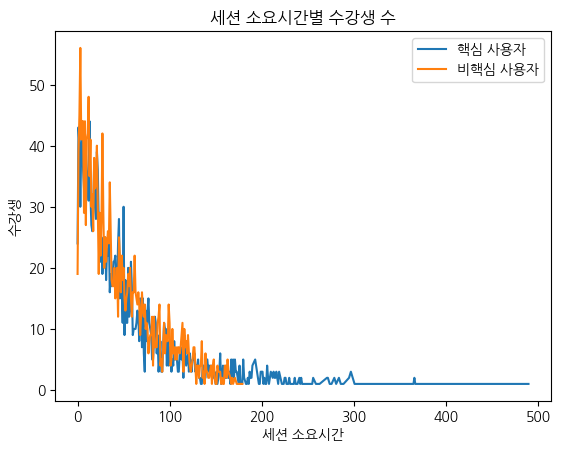

In [96]:
plt.plot(coresestime, label="핵심 사용자")
plt.plot(ncoresestime, label="비핵심 사용자")
plt.title('세션 소요시간별 수강생 수')
plt.xlabel('세션 소요시간')
plt.ylabel('수강생')
plt.legend()
plt.show()

In [61]:
# 핵심사용자그룹 가입기간별 수강생 수 전처리 하기

coresub = core_data.groupby('subscription_duration')['user_id'].count()
coresub = coresub.sort_index()

ncoresub = ncore_data.groupby('subscription_duration')['user_id'].count()
ncoresub = ncoresub.sort_index()

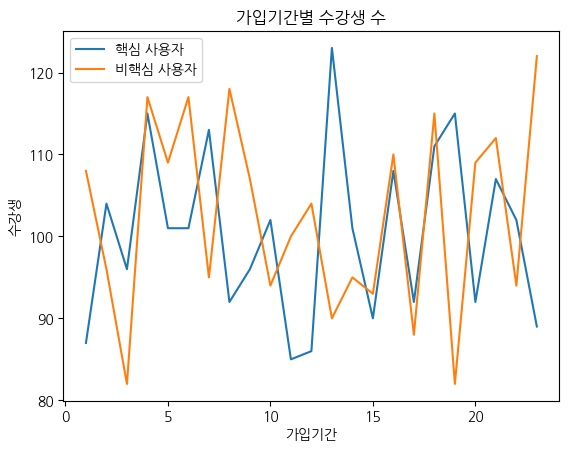

In [63]:
plt.plot(coresub, label="핵심 사용자")
plt.plot(ncoresub, label="비핵심 사용자")
plt.title('가입기간별 수강생 수')
plt.xlabel('가입기간')
plt.ylabel('수강생')
plt.legend()
plt.show()

핵심/비핵심 사용자별 데이터 중 이용시간을 기준으로 데이터를 비교해보았을 때,<br>
가입기간별 데이터 비교 시 차이가 있긴 했으나 일정한 패턴이 있어보이지 않아 일단 다른데이터를 먼저 확인해야 할 것으로 보인다.<br><br>
세션 소요시간별 데이터 비교 시 두 사용자층간 유의미한 차이를 확인할 수 있었다.<br>
핵심 사용자층의 경우 세션 소요시간이 150분 이상인 사용자가 228명으로 모수의 9.87%를 차지하였고<br>
비핵심 사용자층의 경우 세션 소요시간이 150분 이상인 사용자가 51명으로 모수의 2.16%를 차지하였다<br><br>

 핵심 사용자와 비핵심 사용자 모두 평균 구독기간이 12개월임을 감안할 때 학습에 더 긴 시간을 할애했다는 것을 알 수 있으며<br>
 따라서 학습 콘텐츠에 많은 시간을 할애한 사용자가 구독서비스를 연속으로 이용할 확률이 높다는 것을 확인할 수 있다.

### 핵심/비핵심사용자간 이용빈도 데이터 비교

In [65]:
# 핵심사용자그룹 마지막 로그인시간별 수강생 수 전처리 하기

corereclog = core_data.groupby('recent_login_time')['user_id'].count()
corereclog = corereclog.sort_index()

ncorereclog = ncore_data.groupby('recent_login_time')['user_id'].count()
ncorereclog = ncorereclog.sort_index()

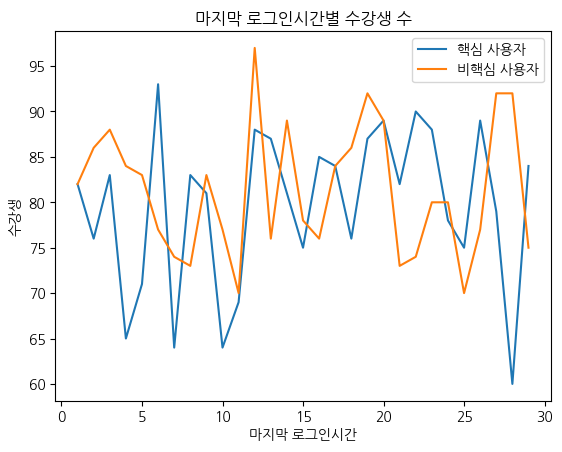

In [66]:
plt.plot(corereclog, label="핵심 사용자")
plt.plot(ncorereclog, label="비핵심 사용자")
plt.title('마지막 로그인시간별 수강생 수')
plt.xlabel('마지막 로그인시간')
plt.ylabel('수강생')
plt.legend()
plt.show()

In [67]:
# 핵심사용자그룹 활동학습일별 수강생 수 전처리 하기

coreaclearn = core_data.groupby('monthly_active_learning_days')['user_id'].count()
coreaclearn = coreaclearn.sort_index()

ncoreaclearn = ncore_data.groupby('monthly_active_learning_days')['user_id'].count()
ncoreaclearn = ncoreaclearn.sort_index()

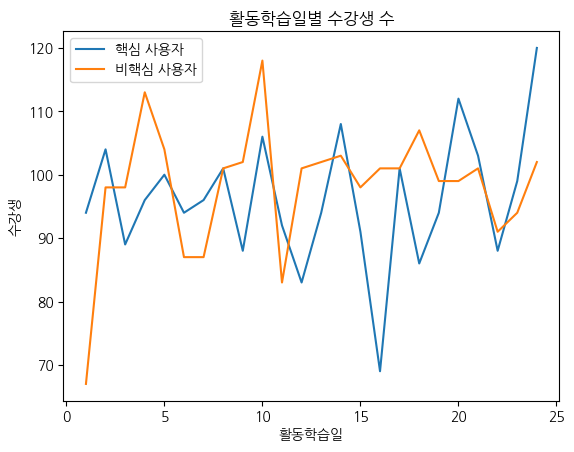

In [68]:
plt.plot(coreaclearn, label="핵심 사용자")
plt.plot(ncoreaclearn, label="비핵심 사용자")
plt.title('활동학습일별 수강생 수')
plt.xlabel('활동학습일')
plt.ylabel('수강생')
plt.legend()
plt.show()

핵심/비핵심 사용자별 데이터 중 이용빈도를 기준으로 데이터를 비교해보았을 때,<br>
마지막 로그인시간별 데이터 비교 시 차이가 있긴 했으나 일정한 패턴이 있어보이지 않아 일단 다른데이터를 먼저 확인해야 할 것으로 보인다.<br><br>
활동학습일별 데이터 비교 시 차이가 있긴 했으나 일정한 패턴이 있어보이지 않아 일단 다른데이터를 먼저 확인해야 할 것으로 보인다.<br>

### 핵심/비핵심사용자간 콘텐츠반응 데이터 비교

In [70]:
# 핵심사용자그룹 커뮤니티 참여도별 수강생 수 전처리 하기

corecomen = core_data.groupby('community_engagement_level')['user_id'].count()
corecomen = corecomen.sort_index()

ncorecomen = ncore_data.groupby('community_engagement_level')['user_id'].count()
ncorecomen = ncorecomen.sort_index()

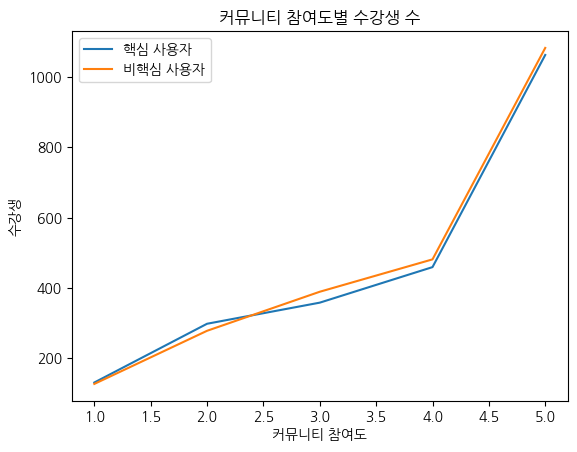

In [71]:
plt.plot(corecomen, label="핵심 사용자")
plt.plot(ncorecomen, label="비핵심 사용자")
plt.title('커뮤니티 참여도별 수강생 수')
plt.xlabel('커뮤니티 참여도')
plt.ylabel('수강생')
plt.legend()
plt.show()

In [73]:
# 핵심사용자그룹 중단학습세션별 수강생 수 전처리 하기

coreabses = core_data.groupby('abandoned_learning_sessions')['user_id'].count()
coreabses = coreabses.sort_index()

ncoreabses= ncore_data.groupby('abandoned_learning_sessions')['user_id'].count()
ncoreabses = ncoreabses.sort_index()

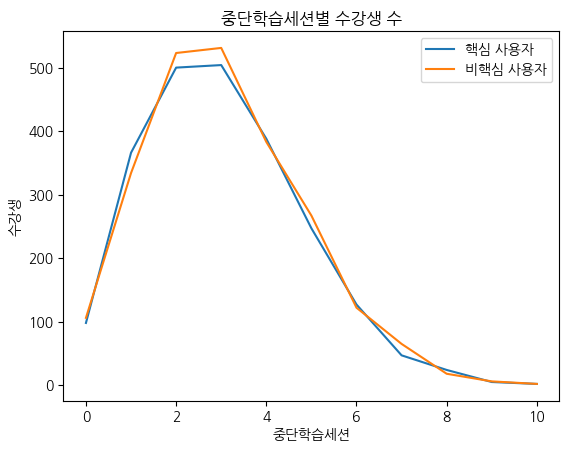

In [74]:
plt.plot(coreabses, label="핵심 사용자")
plt.plot(ncoreabses, label="비핵심 사용자")
plt.title('중단학습세션별 수강생 수')
plt.xlabel('중단학습세션')
plt.ylabel('수강생')
plt.legend()
plt.show()

In [75]:
# 핵심사용자그룹 학습 성취도별 수강생 수 전처리 하기

coreachiev = core_data.groupby('recent_learning_achievement')['user_id'].count()
coreachiev = coreachiev.sort_index()

ncoreachiev= ncore_data.groupby('recent_learning_achievement')['user_id'].count()
ncoreachiev = ncoreachiev.sort_index()

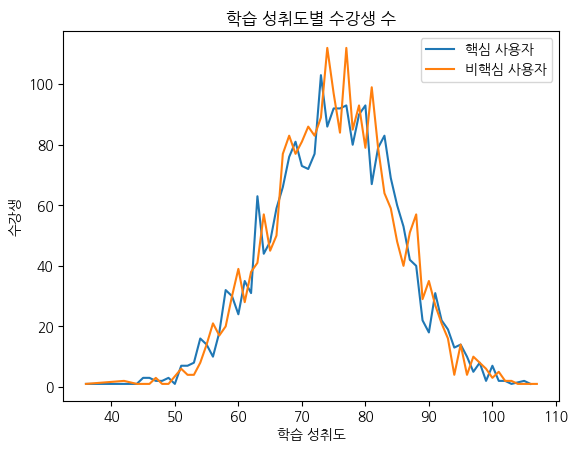

In [76]:
plt.plot(coreachiev, label="핵심 사용자")
plt.plot(ncoreachiev, label="비핵심 사용자")
plt.title('학습 성취도별 수강생 수')
plt.xlabel('학습 성취도')
plt.ylabel('수강생')
plt.legend()
plt.show()

핵심/비핵심 사용자별 데이터 중 콘텐츠 반응을 기준으로 데이터를 비교해보았을 때,<br>
커뮤니티 참여도/중단학습세션/학습성취도 데이터 모두 모집단과 무관하게 거의 일정한 그래프를 그리는 것으로 보아 변별력이 없어보인다

### 핵심/비핵심사용자간 그 외의 데이터 비교

핵심 사용자 데이터 중 그나마 변별력이 있어보이는 데이터는 세션 소요시간뿐인것으로 확인됐다.<br>
그렇다면 학습시간을 더 길게 가져가도록 해야하는데 이는 콘텐츠의 유익함과 재미, 그리고 사용자의 의지가 중요한 요소일 것으로 판단된다.<br>
사용자들은 우리 학습 콘텐츠를 어떻게 생각하고 있을지를 먼저 알아봐야겠다.<br>

그리고 사용자의 의지를 북돋워주기 위해 사용자들이 가장 공부를 많이 하는 시간대에 학습을 독려하는 알림을 주면 어떨까?<br><br>

해당 내용을 알아보기 위해 그 외의 데이터로 분류해두었던 요소들의 상관관계를 조사해보도록하자

In [89]:
# 핵심사용자그룹 고객문의이력별 수강생 수 전처리 하기

corecusinq = core_data.groupby('customer_inquiry_history')['user_id'].count()
corecusinq = corecusinq.sort_index()

ncorecusinq= ncore_data.groupby('customer_inquiry_history')['user_id'].count()
ncorecusinq = ncorecusinq.sort_index()

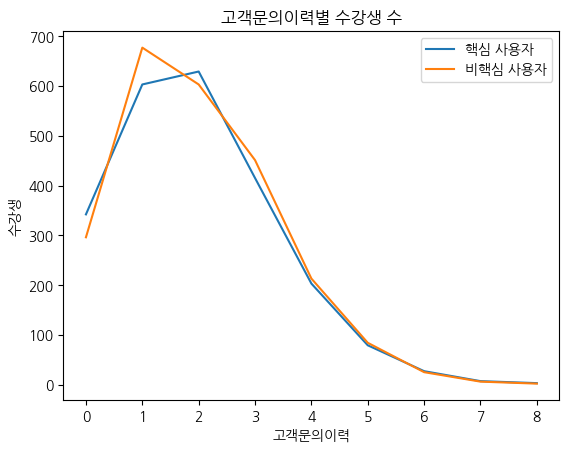

In [90]:
plt.plot(corecusinq, label="핵심 사용자")
plt.plot(ncorecusinq, label="비핵심 사용자")
plt.title('고객문의이력별 수강생 수')
plt.xlabel('고객문의이력')
plt.ylabel('수강생')
plt.legend()
plt.show()

In [91]:
# 핵심사용자그룹 선호난이도별 수강생 수 전처리 하기

corediff = core_data.groupby('preferred_difficulty_level')['user_id'].count()
corediff = corediff.sort_index()

ncorediff = ncore_data.groupby('preferred_difficulty_level')['user_id'].count()
ncorediff = ncorediff.sort_index()

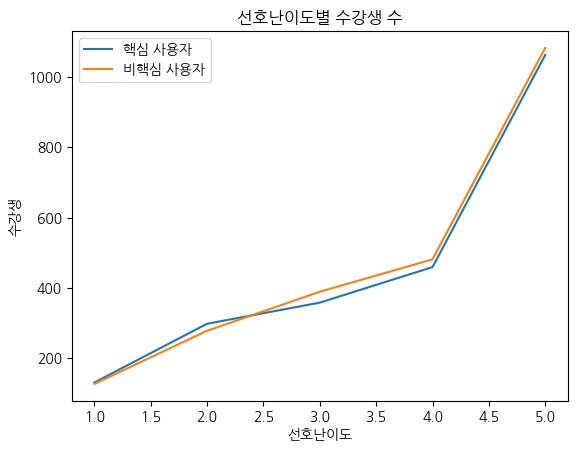

In [92]:
plt.plot(corecommu, label="핵심 사용자")
plt.plot(ncorecommu, label="비핵심 사용자")
plt.title('선호난이도별 수강생 수')
plt.xlabel('선호난이도')
plt.ylabel('수강생')
plt.legend()
plt.show()

In [94]:
# 핵심사용자그룹 로그인 시간대별 수강생 수 전처리 하기

coreavlogtime = core_data.groupby('average_login_time')['user_id'].count()
coreavlogtime = coreavlogtime.sort_index()

ncoreavlogtime = ncore_data.groupby('average_login_time')['user_id'].count()
ncoreavlogtime = ncoreavlogtime.sort_index()

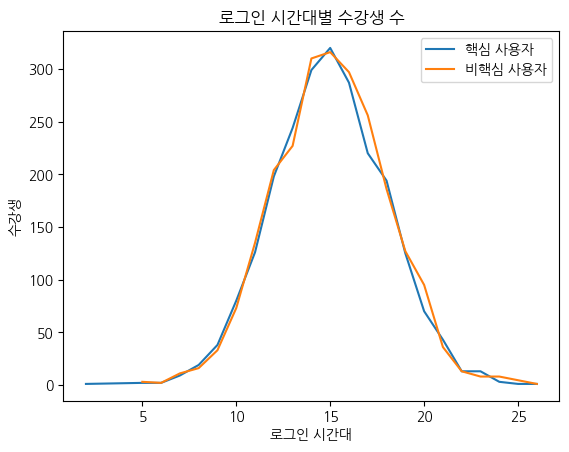

In [95]:
plt.plot(coreavlogtime, label="핵심 사용자")
plt.plot(ncoreavlogtime, label="비핵심 사용자")
plt.title('로그인 시간대별 수강생 수')
plt.xlabel('로그인 시간대')
plt.ylabel('수강생')
plt.legend()
plt.show()

아쉽게도 선호난이도와 고객문의이력 지표를 통해서는 핵심사용자와 비핵심사용자간의 차이를 찾을 수 없었다.
학습을 독려하는 알림은 핵심/비핵심 사용자를 막론하고 150명 이상 로그인하는 시간대인 12:00 ~ 19:00 사이에 보내는 것이 좋을 것 같다.
